In [40]:
import networkx as nx
import numpy as np

In [82]:
def cliqueable(f):
    def w(*args, c=1, full=True, **kwargs):
        g_b = f(*args, **kwargs)
        g = nx.Graph()
        
        for n in g_b.nodes():
            for i in range(c):
                for j in range(i, c):
                    g.add_edge(n * c + i, n * c + j)
                
        for v, u in g_b.edges():
            if full:
                for i in range(c):
                    for j in range(c):
                        g.add_edge(v * c + i, u * c + j)
            else:
                for i in range(c):
                    g.add_edge(v * c + i, u * c + i)
        
        return g
        
    return w

@cliqueable
def graph1():
    g = nx.Graph()
    
    nx.add_cycle(g, range(4))
    # g.add_edge(3, 4)
    
    return g

g1 = graph1(c=1)
g3 = graph1(c=3)

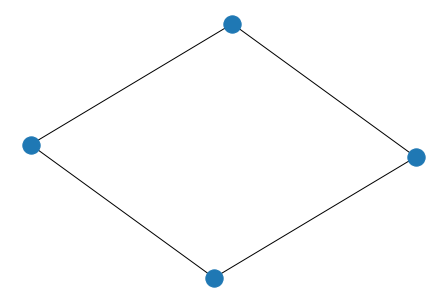

In [86]:
nx.draw(g1)

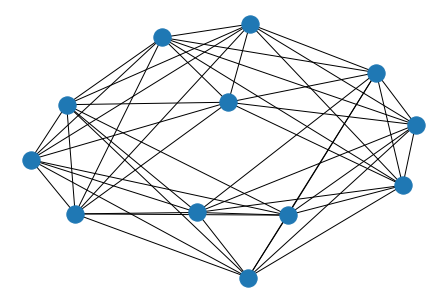

In [90]:
nx.draw(g3)

In [75]:
np.around(nx.linalg.spectrum.laplacian_spectrum(g1), 3)

array([-0.,  2.,  2.,  4.])

In [76]:
np.around(nx.linalg.spectrum.laplacian_spectrum(g3), 3)

array([-0.,  6.,  6.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9., 12.])

In [77]:
np.around(nx.linalg.spectrum.normalized_laplacian_spectrum(g1), 3)

array([0.   , 0.667, 0.667, 1.333])

In [78]:
np.around(nx.linalg.spectrum.normalized_laplacian_spectrum(g3), 3)

array([-0.   ,  0.667,  0.667,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
        1.   ,  1.   ,  1.   ,  1.333])